# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import ExtraTreesRegressor
import pickle
import os

# Simple Mean Model

Original Dataset

In [ ]:
original_train=pd.read_csv('Original_train.csv')
original_cv=pd.read_csv('Original_cv.csv')
original_test=pd.read_csv('Original_test.csv')
y_train=pd.read_csv('y_train.csv')
y_cv=pd.read_csv('y_cv.csv')

In [ ]:
train_pca_poly_drop=pd.read_csv('train_pca_poly_drop.csv')
test_pca_poly_drop=pd.read_csv('test_pca_poly_drop.csv')
cv_pca_poly_drop=pd.read_csv('cv_pca_poly_drop.csv')

In [ ]:
final_train=pd.read_csv('final_train.csv')
final_test=pd.read_csv('final_test.csv')

In [2]:
final_train1=pd.read_csv('final_train1.csv')
final_test1=pd.read_csv('final_test1.csv')

In [ ]:
final_train.shape

(4208, 317)

In [ ]:
final_test.shape

(4209, 317)

In [4]:
test=pd.read_csv("test.csv")
test_id=test['ID']

In [ ]:
original_train.shape

In [ ]:
y_cv.shape

(842, 1)

In [ ]:
Mean_testing_time=y_train.mean()[0]

In [ ]:
Mean_testing_time

100.62629827688639

In [ ]:
y_predicted=np.full((842,1),Mean_testing_time)


In [ ]:
R_squared_original=r2_score(y_cv,y_predicted)
print("R square value of simple mean model for original dataset is ",R_squared_original)

R square value of simple mean model for original dataset is  -2.6558506878160415e-06


R squared value is negative. Hence simple mean model is worst


# Linear Regression

Original Dataset

In [ ]:
regressor=LinearRegression()
regressor.fit(original_train,y_train)
y_pred_orig_LR=regressor.predict(original_cv)

In [ ]:
R_squared_original=r2_score(y_cv,y_pred_orig_LR)
print("R square value of Linear regression model for original dataset is ",R_squared_original)

R square value of Linear regression model for original dataset is  -1.883315540371679e+17


Linear Regression Model with Label encoded data is performing even worst than Simple Mean Model

One Hot Encoded Data+ Linear Regression

In [ ]:
original_train_ohe=pd.read_csv('original_one_hot_encoded_train.csv')
original_cv_ohe=pd.read_csv('original_one_hot_encoded_cv.csv')
original_test_ohe=pd.read_csv('original_one_hot_encoded_test.csv')

In [ ]:
regressor=LinearRegression()
regressor.fit(original_train_ohe,y_train)
y_pred_ohe_LR=regressor.predict(original_cv_ohe)

In [ ]:
R_squared_ohe=r2_score(y_cv,y_pred_ohe_LR)
print("R square value of Linear regression model for One hot encoded dataset is ",R_squared_ohe)

R square value of Linear regression model for One hot encoded dataset is  -5.397687979962753e+22


From above we can see that, R square value for Linear Regression model of one hot encoded data  is negative.
Model is performing bad.

# RandomForest Regressor

Random Forest Regressor+Original

In [ ]:
regressor=RandomForestRegressor()
regressor.fit(original_train,y_train)
y_pred_org_RF=regressor.predict(original_cv)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
R_squared_original=r2_score(y_cv,y_pred_org_RF)
print("R square value of Random Forest model for original dataset is ",R_squared_original)

R square value of Random Forest model for original dataset is  0.4663169872914962


**R squared value for Random Forest of Original Dataset is better than Simple Mean Model and Logistic Regression**

Random Forest+ One hot encoded

In [ ]:
regressor=RandomForestRegressor()
regressor.fit(original_train_ohe,y_train)
y_pred_ohe_RF=regressor.predict(original_cv_ohe)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
R_squared_ohe=r2_score(y_cv,y_pred_ohe_RF)
print("R square value of Random Forest model for original dataset is ",R_squared_ohe)

R square value of Random Forest model for original dataset is  0.48515392623531106


**R square value for Random Forest Model of One hot encoded data is better than Label Encoded Data**

Random Forest+ Original+PCA

In [ ]:
original_pca_train=pd.read_csv("original_pca_train.csv")
original_pca_cv=pd.read_csv("original_pca_cv.csv")
original_pca_test=pd.read_csv("original_pca_test.csv")

In [ ]:
original_pca_train.shape

(3366, 369)

In [ ]:
regressor=RandomForestRegressor()
regressor.fit(original_pca_train,y_train)
y_pred_ohe_RF=regressor.predict(original_pca_cv)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
R_squared_pca=r2_score(y_cv,y_pred_ohe_RF)
print("R square value of Random Forest model for original dataset+PCA is ",R_squared_pca)

R square value of Random Forest model for original dataset+PCA is  0.44203220076743155


When PCA Features are added, it decreases the R square value for same model

Random Forest+PCA+Feature_Iteraction

In [ ]:
original_pca_feat_train=pd.read_csv('original_pca_feat_inter_train.csv')
original_pca_feat_cv=pd.read_csv('original_pca_feat_inter_cv.csv')

In [ ]:
original_pca_test=pd.read_csv('original_pca_test.csv')

In [ ]:
original_pca_feat_train.shape

(3366, 371)

In [ ]:
regressor=RandomForestRegressor()
regressor.fit(original_pca_feat_train,y_train)
y_pred_pca_feat_RF=regressor.predict(original_pca_feat_cv)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
R_squared_pca_feat=r2_score(y_cv,y_pred_pca_feat_RF)
print("R square value of Random Forest model for original dataset+PCA+Feature Interaction is ",R_squared_pca_feat)

R square value of Random Forest model for original dataset+PCA+Feature Interaction is  0.3777836601625414


It can be seen that when PCA and Feature Interaction features are added, R square value is keep dropping for the Same Model.

Modelling with Original Features (Label encoded or One Hot Encoded) is giving good Results

# Boxcox transformation

In [2]:
y=pd.read_csv('Target_variable.csv')

In [ ]:

whole_train_data=pd.read_csv('whole_training_data.csv')
whole_train_data.drop(labels='y',axis=1,inplace=True)

In [ ]:
whole_train_data.shape

(4208, 547)

In [4]:
#Converting into Normal distribution
from scipy.stats import boxcox
from scipy.special import inv_boxcox
y_boxcox,lambda_parameter=boxcox(y.values.flatten())

In [5]:
lambda_parameter

-0.6935216932798669

In [7]:
y_train_boxcox,y_cv_boxcox=train_test_split(y_boxcox,test_size=0.2,random_state=0)

In [ ]:
y_train_boxcox

array([1.38354087, 1.3879375 , 1.37935207, ..., 1.37721979, 1.38725777,
       1.39223587])

In [ ]:
lambda_parameter

-0.6935216932798669

Random Forest+One hot encoded data+ boxcox transformation

In [ ]:
regressor=RandomForestRegressor()
regressor.fit(original_train_ohe,y_train_boxcox)
y_pred_boxcox=regressor.predict(original_cv_ohe)

In [ ]:
R_squared_ohe_boxcox=r2_score(y_cv_boxcox,y_pred_boxcox)
print("R squared value for Random Forest on One Hot Encoded dataset \n with boxcox transformed target variable is ",R_squared_ohe_boxcox)

R squared value for Random Forest on One Hot Encoded dataset 
 with boxcox transformed target variable is  0.5662425109001615


**R squared value for Random Forest with One hot encoded data and boxcox transformation gives 0.57099.**

Random Forest+Labelencoded data+ boxcox transformation

In [ ]:
regressor=RandomForestRegressor()
regressor.fit(original_train,y_train_boxcox)
y_pred_boxcox=regressor.predict(original_cv)

In [ ]:
R_squared_label_boxcox=r2_score(y_cv_boxcox,y_pred_boxcox)
print("R squared value for Random Forest on One Hot Encoded dataset \n with boxcox transformed target variable is ",R_squared_label_boxcox)

R squared value for Random Forest on One Hot Encoded dataset 
 with boxcox transformed target variable is  0.5545052982616665


Random Forest+ Label Encodeddata+PCA

In [ ]:
regressor=RandomForestRegressor(n_estimators=500)
regressor.fit(original_pca_train,y_train_boxcox)
y_pred_boxcox=regressor.predict(original_pca_cv)
R_squared_label_boxcox=r2_score(y_cv_boxcox,y_pred_boxcox)
print("R squared value for Random Forest on Label Encoded dataset and PCA \n with boxcox transformed target variable is ",R_squared_label_boxcox)

R squared value for Random Forest on Label Encoded dataset and PCA 
 with boxcox transformed target variable is  0.5413268163986706


In [ ]:
whole_pca_train=pd.concat([original_pca_train,original_pca_cv],axis=0)
y_pred_RF=regressor.predict(original_pca_test)
y_pred_RF=inv_boxcox(y_pred_RF,lambda_parameter)
submission_RF_pca=pd.DataFrame({'ID':test_id,'y':y_pred_RF})
submission_RF_pca.to_csv('submission_rf_pca.csv',index=False)


**R squared value for Random Forest with One hot encoded data and boxcox transformation gives 0.559.**



*   Dataset with One hot encoding features original dataset and boxcox transformed target variable gives the best performance
*   Dataset with Label encoding original dataset and boxcox transformed target variable gives R squared value slightly less than One Hot encoded dataset.
*   PCA features and Features which are created by feature Interactions are giving less R squared value compared to Original Dataset
*   **Best Dataset is Original Features with One hot encoded and boxcox transformed target variable.**
*   **We can improve R square value by using Xgboost with stacking and hyperparameter tuning**







**Hyperparameter tuning for Random Forest**

In [ ]:
regressor=RandomForestRegressor()
parameters={'n_estimators':[10,50,100,500]}
model=GridSearchCV(regressor,param_grid=parameters,cv=5,n_jobs=-1,scoring='r2',verbose=10,return_train_score=True)
model.fit(original_train_ohe,y_train_boxcox)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [10, 50, 100, 500]},
             return_train_score=True, scoring='r2', verbose=10)

In [ ]:
print(model.best_params_)
print(model.best_score_)

{'n_estimators': 500}
0.6339909458290636


In [ ]:
#Training with best parameters
regressor=RandomForestRegressor(n_estimators=500)
regressor.fit(original_train_ohe,y_train_boxcox)
y_pred_RF=regressor.predict(original_cv_ohe)
R_squared_RF=r2_score(y_cv_boxcox,y_pred_RF)


In [ ]:
regressor=RandomForestRegressor(n_estimators=500)
regressor.fit(whole_train_data,y_boxcox)
y_pred_RF=regressor.predict(original_cv_ohe)
R_squared_RF=r2_score(y_cv_boxcox,y_pred_RF)


In [ ]:
print("R squared value for Random Forest  with boxcox transformed target variable is ",R_squared_RF)

R squared value for Random Forest  with boxcox transformed target variable is  0.5745034829313078


In [ ]:
#Predicting for test dataset
y_pred_RF=regressor.predict(original_test_ohe)


In [ ]:
y_pred_RF=inv_boxcox(y_pred_RF,lambda_parameter)

In [ ]:
submission_RF=pd.DataFrame({'ID':test_id,'y':y_pred_RF})
submission_RF.to_csv('submission_rf.csv',index=False)

In [ ]:
regressor=RandomForestRegressor(n_estimators=500)
regressor.fit(final_train1,y_boxcox)
y_pred_RF=regressor.predict(final_test1)
y_pred_RF=inv_boxcox(y_pred_RF,lambda_parameter)
submission_rf=pd.DataFrame({'ID':test_id,'y':y_pred_RF})
submission_rf['y']=submission_rf['y'].apply(lambda x: np.round(x)+1)


**From this model I have achieved a private score of 0.50172 on kaggle and 0.52061 public score**

# XGBOOST

In [ ]:
regressor=XGBRegressor()
parameters={'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
            'n_estimators':[5,10,50, 75, 100]}
model=GridSearchCV(regressor,param_grid=parameters,cv=3,n_jobs=-1,scoring='r2',verbose=10,return_train_score=True)
model.fit(original_train_ohe,y_train_boxcox)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[16:25:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                         'n_estimators': [5, 10, 50, 75, 100]},
             return_train_score=True, scoring='r2', verbose=10)

In [ ]:
print(model.best_params_)
print(model.best_score_)

{'learning_rate': 0.1, 'n_estimators': 100}
0.6751635066937509


In [ ]:
#Training with best parameters
regressor=XGBRegressor(learning_rate=0.1,n_estimators=100)
regressor.fit(original_train_ohe,y_train_boxcox)
y_pred_xgb1=regressor.predict(original_cv_ohe)
R_squared=r2_score(y_cv_boxcox,y_pred_xgb1)
print("R squared value for XGboost  with boxcox transformed target variable is ",R_squared)

[15:27:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R squared value for XGboost  with boxcox transformed target variable is  0.6251356796060563


In [ ]:
regressor=XGBRegressor(learning_rate=0.1,n_estimators=100)
regressor.fit(whole_train_data,y_boxcox)

In [ ]:
#Predicting for test dataset
y_pred_Xgboost=regressor.predict(original_test_ohe)
y_pred_xg=inv_boxcox(y_pred_Xgboost,lambda_parameter)
submission_xg=pd.DataFrame({'ID':test_id,'y':y_pred_xg})
submission_xg.to_csv('submission_xg.csv',index=False)

Xgboost+ label encoded full features

In [ ]:
regressor=XGBRegressor(learning_rate=0.1,n_estimators=100)
regressor.fit(original_train,y_train_boxcox)
y_pred_Xgboost=regressor.predict(original_cv)
R_squared=r2_score(y_cv_boxcox,y_pred_Xgboost)
print("R squared value for XGboost  with boxcox transformed target variable is ",R_squared)
y_pred_Xgboost=regressor.predict(original_test)
y_pred_xg=inv_boxcox(y_pred_Xgboost,lambda_parameter)
submission_xg=pd.DataFrame({'ID':test_id,'y':y_pred_xg})
submission_xg.to_csv('submission_xg.csv',index=False)

[07:27:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R squared value for XGboost  with boxcox transformed target variable is  0.6307224617364957


Xgboost+labelencoded(drop same variance features)

In [ ]:
regressor=XGBRegressor(learning_rate=0.1,n_estimators=100)
regressor.fit(original_train,y_train_boxcox)
y_pred_Xgboost=regressor.predict(original_cv)
R_squared=r2_score(y_cv_boxcox,y_pred_Xgboost)
print("R squared value for XGboost  with boxcox transformed target variable is ",R_squared)
y_pred_Xgboost=regressor.predict(original_test)
y_pred_xg=inv_boxcox(y_pred_Xgboost,lambda_parameter)
submission_xg=pd.DataFrame({'ID':test_id,'y':y_pred_xg})
submission_xg.to_csv('submission_xg_label_drop_same_variance.csv',index=False)

[07:35:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R squared value for XGboost  with boxcox transformed target variable is  0.6309356585755503


Xgboost+labelencoded(drop same variance features)+PCA



In [ ]:
regressor=XGBRegressor(learning_rate=0.1,n_estimators=100)
regressor.fit(original_pca_train,y_train_boxcox)
y_pred_Xgboost=regressor.predict(original_pca_cv)
R_squared=r2_score(y_cv_boxcox,y_pred_Xgboost)
print("R squared value for XGboost  with boxcox transformed target variable is ",R_squared)
y_pred_Xgboost=regressor.predict(original_pca_test)
y_pred_xg=inv_boxcox(y_pred_Xgboost,lambda_parameter)
submission_xg_label_pca_drop_variance=pd.DataFrame({'ID':test_id,'y':y_pred_xg})
submission_xg_label_pca_drop_variance.to_csv('submission_xg_label_pca_drop_same_variance.csv',index=False)

[09:08:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R squared value for XGboost  with boxcox transformed target variable is  0.6299756415190506


Xgboost+labelencoded(drop same variance features)+PCA+Polynomial Features

In [ ]:
regressor=XGBRegressor(learning_rate=0.1,n_estimators=100)
regressor.fit(train_pca_poly_drop,y_train_boxcox)
y_pred_Xgboost=regressor.predict(cv_pca_poly_drop)
R_squared=r2_score(y_cv_boxcox,y_pred_Xgboost)
print("R squared value for XGboost  with boxcox transformed target variable is ",R_squared)
y_pred_Xgboost=regressor.predict(test_pca_poly_drop)
y_pred_xg=inv_boxcox(y_pred_Xgboost,lambda_parameter)
submission_xg_label_pca_poly=pd.DataFrame({'ID':test_id,'y':y_pred_xg})
submission_xg_label_pca_poly.to_csv('submission_xg_label_pca_poly.csv',index=False)

[10:07:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R squared value for XGboost  with boxcox transformed target variable is  0.6270063345719632


**Xgboost on whole training dataset**

In [ ]:
regressor=XGBRegressor()
parameters={'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
            'n_estimators':[5,10,50, 75, 100]}
model=GridSearchCV(regressor,param_grid=parameters,cv=3,n_jobs=-1,scoring='r2',verbose=10,return_train_score=True)
model.fit(final_train,y_boxcox)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[15:52:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                         'n_estimators': [5, 10, 50, 75, 100]},
             return_train_score=True, scoring='r2', verbose=10)

In [ ]:
print(model.best_params_)
print(model.best_score_)

{'learning_rate': 0.1, 'n_estimators': 75}
0.6578113648639451


In [ ]:
regressor=XGBRegressor(learning_rate=0.1,n_estimators=100)
regressor.fit(final_train,y_boxcox)
y_pred_Xgboost=regressor.predict(final_test)
y_pred_xg=inv_boxcox(y_pred_Xgboost,lambda_parameter)
submission_xg_label_pca_poly=pd.DataFrame({'ID':test_id,'y':y_pred_xg})
submission_xg_label_pca_poly['y']=submission_xg_label_pca_poly['y'].apply(lambda x: np.round(x)+1)
submission_xg_label_pca_poly.to_csv('submission_xg_final2.csv',index=False)

[16:02:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [10]:
regressor=XGBRegressor(learning_rate=0.1,n_estimators=100)
regressor.fit(final_train1,y_boxcox)
y_pred_Xgboost=regressor.predict(final_test1)
y_pred_xg=inv_boxcox(y_pred_Xgboost,lambda_parameter)
submission_xg_label_pca_poly=pd.DataFrame({'ID':test_id,'y':y_pred_xg})
submission_xg_label_pca_poly['y']=submission_xg_label_pca_poly['y'].apply(lambda x: np.round(x)+1)
submission_xg_label_pca_poly.to_csv('submission_xg_final3.csv',index=False)
file=open('best_model','wb')
pickle.dump(regressor,file)
file.close()

[06:32:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


**From this model I have achieved a private score of 0.54775
 on kaggle and 0.55343
 public score**

# LGBM

In [ ]:
regressor=LGBMRegressor(boosting_type='gbdt')
parameters={'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],'n_estimators':[5,10,50, 75, 100]}
model=GridSearchCV(regressor,param_grid=parameters,scoring='r2',cv=3,return_train_score=True,verbose=20,n_jobs=-1)
model.fit(original_train_ohe,y_train_boxcox)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                         'n_estimators': [5, 10, 50, 75, 100]},
             return_train_score=True, scoring='r2', verbose=20)

In [ ]:
print(model.best_params_)
print(model.best_score_)

{'learning_rate': 0.3, 'n_estimators': 10}
0.6625770283753385


In [ ]:
#Training with best parameters
regressor=LGBMRegressor(learning_rate=0.1,n_estimators=100)
regressor.fit(original_train_ohe,y_train_boxcox)
y_pred=regressor.predict(original_cv_ohe)
R_squared=r2_score(y_cv_boxcox,y_pred)
print("R squared value for LGBM  with boxcox transformed target variable is ",R_squared)

R squared value for LGBM  with boxcox transformed target variable is  0.591518970579828


In [ ]:

y_pred_lgbm=regressor.predict(original_test_ohe)
y_pred_lgbm=inv_boxcox(y_pred_lgbm,lambda_parameter)
submission_lgbm=pd.DataFrame({'ID':test_id,'y':y_pred_lgbm})
submission_lgbm.to_csv('submission_lgbm.csv',index=False)

**From this model I have achieved a private score of 0.52203 on kaggle and 0.52472 public score**

In [ ]:
regressor=LGBMRegressor(learning_rate=0.1,n_estimators=100)
regressor.fit(final_train1,y_boxcox)
y_pred_lgbm=regressor.predict(final_test1)
y_pred_lgbm=inv_boxcox(y_pred_lgbm,lambda_parameter)
submission_lgbm=pd.DataFrame({'ID':test_id,'y':y_pred_lgbm})
submission_lgbm['y']=submission_lgbm['y'].apply(lambda x: np.round(x)+1)


# Stacking 

# Stacking of XGboost, Random Forest, LGBM

In [ ]:
y_pred_stack=(submission_rf['y']+submission_xg_label_pca_poly['y']+submission_lgbm['y'])/3

In [ ]:

submission_stacked=pd.DataFrame({'ID':test_id,'y':y_pred_stack})
submission_stacked.to_csv('submission_stacked3.csv',index=False)

**From stacked model I have achieved a private score of 0.53660 on kaggle and 0.54126 public score**

# Stacking

Custom Stacking classifier:

1) Split your whole data into train and test(80-20)

2) Now, in the 80% train set, split the train set into D1 and D2.(50-50).

From this D1, do sampling with replacement to create d1,d2,d3....dk(k samples).

Now create 'k' models and train each of these models with each of these k samples.


3) Now pass the D2 set to each of these k models; now, you will get k predictions for D2 from each of these models.


4) Now, using these k predictions, create a new dataset, and for D2 you already know its corresponding target values, so now you train a metamodel with these k predictions.


5) Now, for model evaluation, you have can use the 20% data that you have kept as the test set. Pass that test set to each of the base models, and you will get 'k' predictions. Now you create a new dataset with these k predictions and pass it to your metamodel, and you will get the final prediction. Using this final prediction and the targets for the test set, you can calculate the model's performance score.



Taking 3 Models. RF,Xgboost and LGBM

In [ ]:
from sklearn.model_selection import train_test_split
from random import choices
X_train,X_test,y_train,y_test=train_test_split(final_train1,y_boxcox,test_size=0.2,random_state=0)
D1_train,D2_train,y_D1,y_D2=train_test_split(X_train,y_train,test_size=0.5,random_state=0)


In [ ]:
D1_train.reset_index(inplace=True,drop=True)
D2_train.reset_index(inplace=True,drop=True)

In [ ]:
k1=D1_train.sample(n=3000,replace=True,random_state=0)

In [ ]:
k1_y=pd.DataFrame(y_D1,columns=['y']).sample(n=3000,replace=True,random_state=0)

In [ ]:
k2=D1_train.sample(n=3000,replace=True,random_state=10)
k3=D1_train.sample(n=3000,replace=True,random_state=11)
k2_y=pd.DataFrame(y_D1,columns=['y']).sample(n=3000,replace=True,random_state=10)
k3_y=pd.DataFrame(y_D1,columns=['y']).sample(n=3000,replace=True,random_state=11)

In [ ]:
k1.reset_index(drop=True,inplace=True)
k2.reset_index(drop=True,inplace=True)
k3.reset_index(drop=True,inplace=True)
k1_y.reset_index(drop=True,inplace=True)
k2_y.reset_index(drop=True,inplace=True)
k3_y.reset_index(drop=True,inplace=True)


In [ ]:
#K1 model i.e Random Forest
reg_rf=RandomForestRegressor(n_estimators=500)
reg_rf.fit(k1,k1_y)
k1_prediction=reg_rf.predict(D2_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#K2 model i.e Xgboost
reg_xg=XGBRegressor(learning_rate=0.1,n_estimators=100)
reg_xg.fit(k2,k2_y)
k2_prediction=reg_xg.predict(D2_train)

[02:54:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#K3 model i.e LGBM
reg_lgbm=LGBMRegressor(learning_rate=0.3,n_estimators=100)
reg_lgbm.fit(k3,k3_y)
k3_prediction=reg_lgbm.predict(D2_train)

In [ ]:
#Creating K predictions model
k_pred_df=pd.DataFrame(list(zip(k1_prediction,k2_prediction,k3_prediction)),columns=['k1','k2','k3'])

In [ ]:
#Training Meta Model i.e XGboost on these k predictions
meta_model=XGBRegressor(learning_rate=0.1,n_estimators=100)
meta_model.fit(k_pred_df,y_D2)

[03:07:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#Now passing 20%Dataset i.e X_test,y_test
k1_pred_test=reg_rf.predict(X_test)
k2_pred_test=reg_xg.predict(X_test)
k3_pred_test=reg_lgbm.predict(X_test)
k_pred_test_df=pd.DataFrame(list(zip(k1_pred_test,k2_pred_test,k3_pred_test)),columns=['k1','k2','k3'])

In [ ]:
#Predicting 20%Dataset values
final_prediction=meta_model.predict(k_pred_test_df)
#Evaluating R2 score
R2_score_stacked=r2_score(y_test,final_prediction)
print('R2 square for Stacking Classifier is ',R2_score_stacked)

R2 square for Stacking Classifier is  0.6015899979949344


In [ ]:
#Predicting our Real test dataset 
k1_pred_final=reg_rf.predict(final_test1)
k2_pred_final=reg_xg.predict(final_test1)
k3_pred_final=reg_lgbm.predict(final_test1)
k_pred_final_df=pd.DataFrame(list(zip(k1_pred_final,k2_pred_final,k3_pred_final)),columns=['k1','k2','k3'])

In [ ]:
#Predicting our Real test dataset and Evaluating Kaggle score
y_pred_test=meta_model.predict(k_pred_final_df)
y_pred_test=inv_boxcox(y_pred_test,lambda_parameter)
submission_stacked=pd.DataFrame({'ID':test_id,'y':y_pred_test})
submission_stacked['y']=submission_stacked['y'].apply(lambda x: np.round(x)+1)
submission_stacked.to_csv('submission_stacked_classifier.csv',index=False)

**This Stacking Classifier is giving a Private score of 0.53576 and Public score of 0.54076**

In [ ]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=['Model','Data','R-squared value','Public score','Private score']
x.add_row(['Random Forest','Original Features(Label Encoded)','0.452422','-','-'])
x.add_row(['Random Forest','Original Features(One hot encoded)',' 0.485153926','-','-'])
x.add_row(['Random Forest','Original+PCA','0.442','-','-'])
x.add_row(['Random Forest','Original+PCA+Feature Interaction','0.377','-','-'])
x.add_row(['Random Forest','Original with Boxcox dependent variable',' 0.5719','0.52061','0.50172'])
x.add_row(['Xgboost','Original ','0.625','0.547','0.547'])
x.add_row(['Xgboost','Original+PCA+Polynomial','-','0.55343','0.54775'])
x.add_row(['LGBM','Original with Boxcox dependent variable','0.5915','0.524','0.522'])
x.add_row(['Extra Tree Regressor','Original with Boxcox dependent variable','0.343','-','-'])
x.add_row(['Stacked Model(Random Forest+XGboost+LGBM)','Original+PCA+Polynomial','-','0.54076','0.53576'])

In [ ]:
print(x)

+-------------------------------------------+-----------------------------------------+-----------------+--------------+---------------+
|                   Model                   |                   Data                  | R-squared value | Public score | Private score |
+-------------------------------------------+-----------------------------------------+-----------------+--------------+---------------+
|               Random Forest               |     Original Features(Label Encoded)    |     0.452422    |      -       |       -       |
|               Random Forest               |    Original Features(One hot encoded)   |    0.485153926  |      -       |       -       |
|               Random Forest               |               Original+PCA              |      0.442      |      -       |       -       |
|               Random Forest               |     Original+PCA+Feature Interaction    |      0.377      |      -       |       -       |
|               Random Forest            

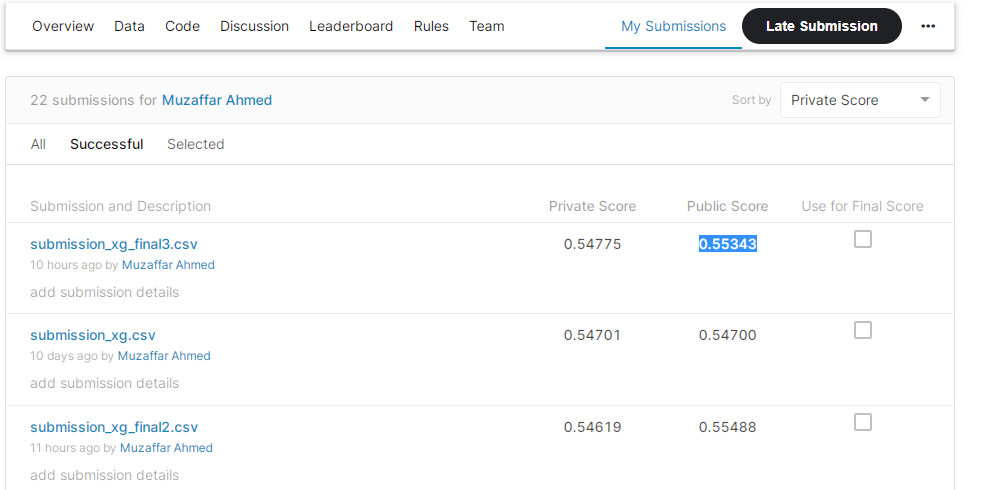

# Conclusion
**Best kaggle private score achieved is 0.54775 and public score is 0.55343 using Xgboost model with PCA and Polynomial Features**